In [1]:
!pip install tensorboardcolab

  Running setup.py bdist_wheel for tensorboardcolab ... - done
  Stored in directory: /root/.cache/pip/wheels/ab/74/02/cda602d1dc28b2f12eab313c49b9bfa14d6371326bc2590e06
Successfully built tensorboardcolab


In [2]:
import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

0


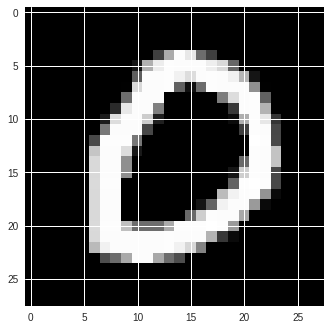

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2100], cmap="gray")
print(y_train[2100])

In [0]:
from keras.layers import Flatten, Dense, Conv2D, InputLayer, MaxPooling2D, Dropout

In [0]:
from keras.models import Sequential

In [0]:
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy

In [0]:
model = Sequential()
model.add(InputLayer((28, 28, 1)))
model.add(Conv2D(64, (3,3), strides=(1,1), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), strides=(1,1), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), strides=(1,1), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer=SGD(), loss="categorical_crossentropy", metrics=["accuracy"])

model

In [0]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)

In [13]:
from keras.utils import to_categorical
from keras.callbacks import TensorBoard
tb = TensorBoard(log_dir=".")

from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
tbc = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://e3c6de15.ngrok.io


In [0]:
y_train = to_categorical(y_train)

In [15]:
model.fit(x_train, y_train, validation_split=0.2, epochs=50, callbacks=[TensorBoardColabCallback(tbc)])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 20s 422us/step - loss: 1.1691 - acc: 0.6161 - val_loss: 0.4832 - val_acc: 0.8505
Epoch 2/50
48000/48000 [==============================] - 17s 363us/step - loss: 0.4516 - acc: 0.8467 - val_loss: 0.3095 - val_acc: 0.8792
Epoch 3/50
48000/48000 [==============================] - 17s 364us/step - loss: 0.3496 - acc: 0.8633 - val_loss: 0.2606 - val_acc: 0.8827
Epoch 4/50
48000/48000 [==============================] - 17s 360us/step - loss: 0.3007 - acc: 0.8728 - val_loss: 0.2786 - val_acc: 0.8737
Epoch 5/50
48000/48000 [==============================] - 17s 358us/step - loss: 0.2779 - acc: 0.8758 - val_loss: 0.2408 - val_acc: 0.8870
Epoch 6/50
48000/48000 [==============================] - 17s 358us/step - loss: 0.2542 - acc: 0.8819 - val_loss: 0.2335 - val_acc: 0.8852
Epoch 7/50
48000/48000 [==============================] - 17s 357us/step - loss: 0.2447 - acc: 0.8848 - val_loss: 0.

KeyboardInterrupt: ignored

In [0]:
import pickle as pkl

In [0]:
pkl.dump({"model": model}, open("model.pkl", "wb"))

In [0]:
import numpy as np 

6


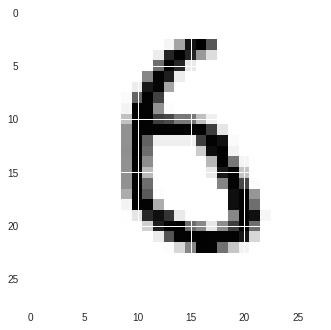

In [31]:
test_image = x_test[786]
print(np.argmax(model.predict(test_image.reshape(1, test_image.shape[0], test_image.shape[1], 1))))
plt.imshow(test_image)